In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, NMF

from luwiji.dimensionality_reduction import illustration

# Import Data

In [3]:
df = pd.read_csv("data/lfw_people.csv")
df.head()

,pixel_1-1,pixel_1-2,pixel_1-3,pixel_1-4,pixel_1-5,pixel_1-6,pixel_1-7,pixel_1-8,pixel_1-9,pixel_1-10,...,pixel_87-57,pixel_87-58,pixel_87-59,pixel_87-60,pixel_87-61,pixel_87-62,pixel_87-63,pixel_87-64,pixel_87-65,name
0,57,60,78,120,156,178,195,210,221,222,...,41,17,15,20,19,18,17,16,22,Winona Ryder
1,66,80,88,68,63,96,115,127,139,148,...,25,18,11,8,8,8,8,8,9,Jean Chretien
2,18,14,15,13,14,23,55,92,125,154,...,253,251,240,172,47,20,22,22,25,Carlos Menem
3,76,113,172,201,199,190,177,167,167,171,...,82,115,131,137,136,138,140,143,143,Ariel Sharon
4,79,70,70,81,99,126,144,156,164,168,...,88,91,90,89,85,83,80,74,64,Alvaro Uribe


# Dataset Splitting

In [4]:
x = df.drop(columns="name").values
y = df.name.values

X_train, X_test, Y_train, Y_test = train_test_split( x, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((2418, 5655), (605, 5655), (2418,), (605,))

# Visualize

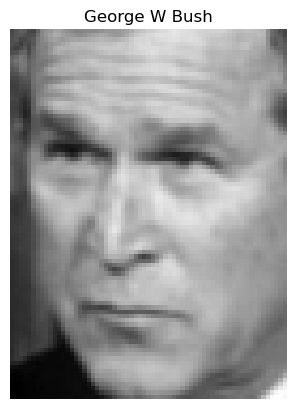

In [5]:
idx = 2
plt.imshow(X_train[idx].reshape(87, 65), cmap="gray")
plt.title(Y_train[idx])
plt.axis("off")
plt.show()

# PCA

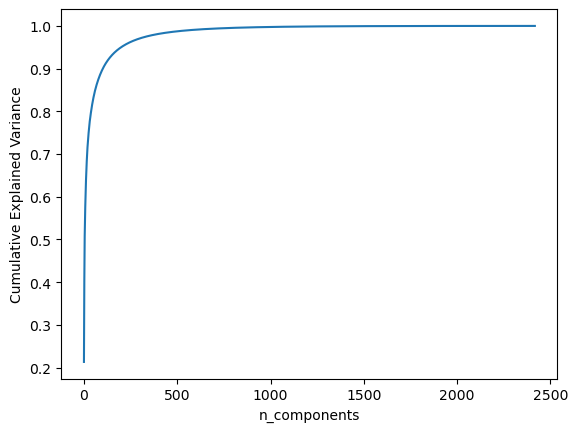

In [6]:
pca = PCA().fit(X_train)

plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel("n_components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

In [7]:
pca = PCA(n_components=250, whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

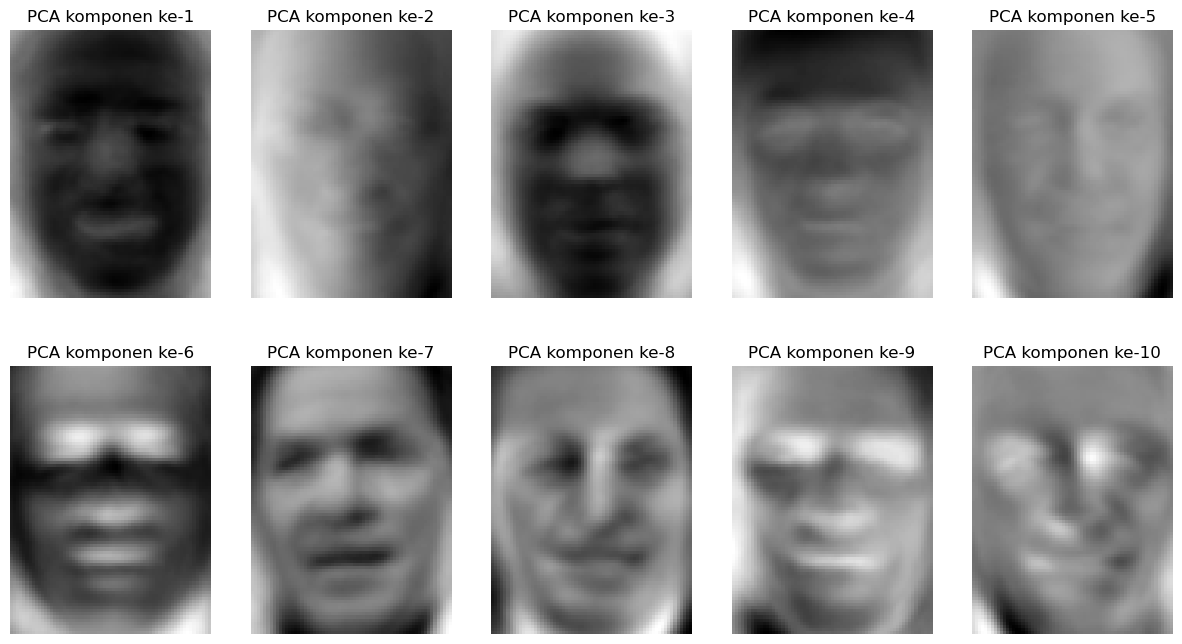

In [8]:
plt.figure(figsize=(15, 8))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(pca.components_[i].reshape(87, 65), cmap="gray")
    plt.title(f"PCA komponen ke-{i+1}")
    plt.axis("off");

In [9]:
X_train_inv = pca.inverse_transform(X_train_pca)

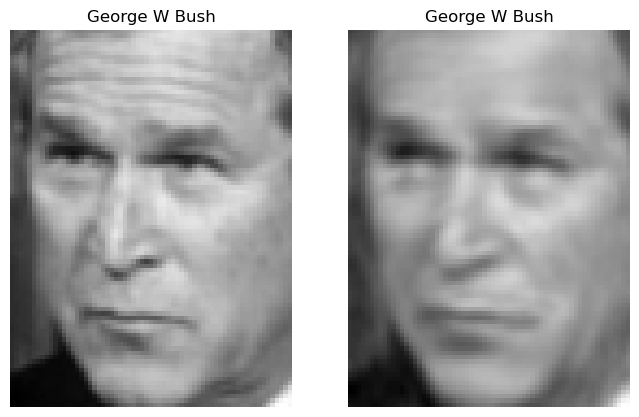

In [10]:
plt.figure(figsize=(8, 5))

plt.subplot(121)
plt.imshow(X_train[2].reshape(87, 65), cmap='gray')
plt.title(Y_train[2])
plt.axis('off')

plt.subplot(122)
plt.imshow(X_train_inv[2].reshape(87, 65), cmap='gray')
plt.title(Y_train[2])
plt.axis('off');
